In [120]:
import pandas as pd
data=pd.read_csv('Table1.csv')
data['age']=2019-data['Year_of_publication']+1
data['citation_per_year']=data['Number_of_citations']/data['age']
data.head()

,Year_of_publication,Number_of_citations,index,global,wrapper,local,chain_of_seeds,technology,age,citation_per_year
0,2001,1093.0,hashing,seed,N,Global,N,DNA,19,57.526316
1,2002,6935.0,hashing,seed,N,Non-DP heuristic,Y,DNA,18,385.277778
2,2003,1339.0,hashing,seed,Y,Local,N,DNA,17,78.764706
3,2005,1138.0,hashing,seed,N,Hamming,N,DNA,15,75.866667
4,2005,1139.0,hashing,seed,N,Global,Y,DNA,15,75.933333


In [119]:
value_counts=data['technology'].value_counts(normalize=True)
data_technology = pd.DataFrame(value_counts)
data_technology = data_technology.reset_index()
data_technology.columns = ['technology', 'counts'] # change column names
data_technology.head()

,technology,counts
0,DNA,0.717391
1,RNA-Seq,0.184783
2,Bisulfite,0.065217
3,DNA/RNA-Seq,0.021739
4,miRNA,0.010870


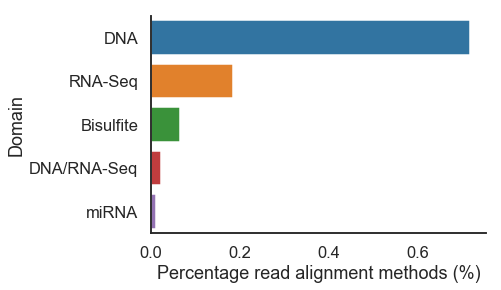

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="counts", y="technology", data=data_technology)
g.set(xlabel='Percentage read alignment methods (%)', ylabel='Domain')
g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/technology_barplot.png", bbox_inches='tight')

In [122]:
def f(x):
  if x['index'] == 'hashing': return 'hashing'
  elif x['index'] == 'BWT-FM': return 'FM-index'
  else: return 'Other suffix tree structure'

data['index2'] = data.apply(f, axis=1)
data.head()

,Year_of_publication,Number_of_citations,index,global,wrapper,local,chain_of_seeds,technology,age,citation_per_year,index2
0,2001,1093.0,hashing,seed,N,Global,N,DNA,19,57.526316,hashing
1,2002,6935.0,hashing,seed,N,Non-DP heuristic,Y,DNA,18,385.277778,hashing
2,2003,1339.0,hashing,seed,Y,Local,N,DNA,17,78.764706,hashing
3,2005,1138.0,hashing,seed,N,Hamming,N,DNA,15,75.866667,hashing
4,2005,1139.0,hashing,seed,N,Global,Y,DNA,15,75.933333,hashing


In [123]:
value_counts=data['index2'].value_counts(normalize=True)
data_index = pd.DataFrame(value_counts)
data_index = data_index.reset_index()
data_index.columns = ['index', 'counts'] # change column names
data_index.head()

,index,counts
0,hashing,0.630435
1,FM-index,0.282609
2,Other suffix tree structure,0.086957


In [145]:
data_RNA=data.loc[data['technology'] == 'RNA-Seq']
data_RNA.head()

,Year_of_publication,Number_of_citations,index,global,wrapper,local,chain_of_seeds,technology,age,citation_per_year,index2
7,2008,173.0,suffix array,seed,Y,Local,N,RNA-Seq,12,14.416667,Other suffix tree structure
30,2009,8395.0,BWT-FM,seed,Y,Hamming Distance,N,RNA-Seq,11,763.181818,FM-index
34,2010,774.0,BWT-FM,Backward Search,Y,Hamming Distance,N,RNA-Seq,10,77.400000,FM-index
39,2010,335.0,hashing,seed,Y,Hamming Distance,N,RNA-Seq,10,33.500000,hashing
40,2010,58.0,hashing,seed,N,No Alignment,N,RNA-Seq,10,5.800000,hashing


In [135]:
data_DNA=data.loc[data['technology'] == 'DNA']
data_DNA.head()

,Year_of_publication,Number_of_citations,index,global,wrapper,local,chain_of_seeds,technology,age,citation_per_year,index2
0,2001,1093.0,hashing,seed,N,Global,N,DNA,19,57.526316,hashing
1,2002,6935.0,hashing,seed,N,Non-DP heuristic,Y,DNA,18,385.277778,hashing
2,2003,1339.0,hashing,seed,Y,Local,N,DNA,17,78.764706,hashing
3,2005,1138.0,hashing,seed,N,Hamming,N,DNA,15,75.866667,hashing
4,2005,1139.0,hashing,seed,N,Global,Y,DNA,15,75.933333,hashing


In [136]:
data_BS=data.loc[data['technology'] == 'Bisulfite']
data_BS.head()

,Year_of_publication,Number_of_citations,index,global,wrapper,local,chain_of_seeds,technology,age,citation_per_year,index2
15,2009,62.0,hashing,seed,N,Hamming Distance,N,Bisulfite,11,5.636364,hashing
16,2009,475.0,hashing,seed,N,Hamming Distance,N,Bisulfite,11,43.181818,hashing
31,2010,213.0,BWT-FM,Backward Search,Y,Hamming Distance,N,Bisulfite,10,21.300000,FM-index
42,2011,1332.0,BWT-FM,Backward Search,Y,Hamming Distance,N,Bisulfite,9,148.000000,FM-index
53,2012,65.0,BWT-FM,Backward Search,N,Hamming Distance,N,Bisulfite,8,8.125000,FM-index


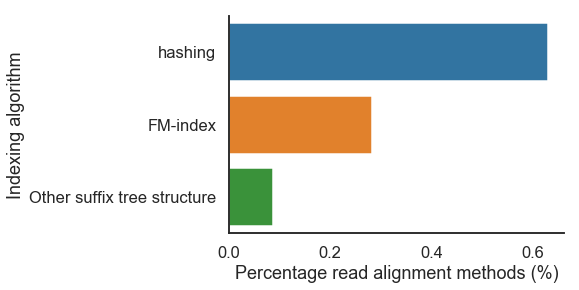

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="counts", y="index", data=data_index)
g.set(xlabel='Percentage read alignment methods (%)', ylabel='Indexing algorithm')
g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/index_barplot.png", bbox_inches='tight')

In [137]:
value_counts=data_RNA['index2'].value_counts(normalize=True)
data_index_RNA = pd.DataFrame(value_counts)
data_index_RNA = data_index_RNA.reset_index()
data_index_RNA.columns = ['index', 'counts'] # change column names
data_index_RNA.head()

,index,counts
0,FM-index,0.529412
1,hashing,0.352941
2,Other suffix tree structure,0.117647


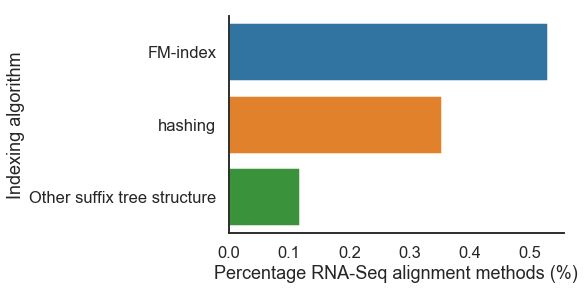

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="counts", y="index", data=data_index_RNA)
g.set(xlabel='Percentage RNA-Seq alignment methods (%)', ylabel='Indexing algorithm')
g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/index_barplot_RNASeq.png", bbox_inches='tight')

In [139]:
value_counts=data_DNA['index2'].value_counts(normalize=True)
data_index_DNA = pd.DataFrame(value_counts)
data_index_DNA = data_index_DNA.reset_index()
data_index_DNA.columns = ['index', 'counts'] # change column names
data_index_DNA.head()

,index,counts
0,hashing,0.712121
1,FM-index,0.196970
2,Other suffix tree structure,0.090909


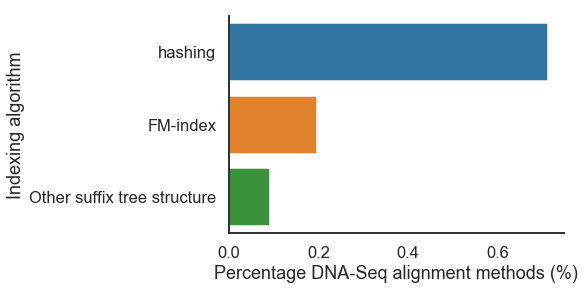

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="counts", y="index", data=data_index_DNA)
g.set(xlabel='Percentage DNA-Seq alignment methods (%)', ylabel='Indexing algorithm')
g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/index_barplot_DNASeq.png", bbox_inches='tight')

In [156]:
value_counts=data_BS['index2'].value_counts(normalize=True)
data_index_BS = pd.DataFrame(value_counts)
data_index_BS = data_index_BS.reset_index()
data_index_BS.columns = ['index', 'counts'] # change column names
data_index_BS.head()

,index,counts
0,FM-index,0.666667
1,hashing,0.333333


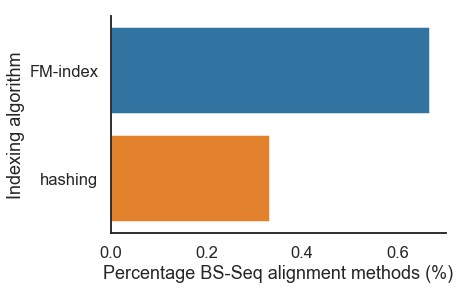

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="counts", y="index", data=data_index_BS)
g.set(xlabel='Percentage BS-Seq alignment methods (%)', ylabel='Indexing algorithm')
g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/index_barplot_BSSeq.png", bbox_inches='tight')

In [127]:
value_counts=data['wrapper'].value_counts(normalize=True)
data_wrapper = pd.DataFrame(value_counts)
data_wrapper = data_wrapper.reset_index()
data_wrapper.columns = ['index', 'counts'] # change column names
data_wrapper.head()

,index,counts
0,N,0.836957
1,Y,0.163043


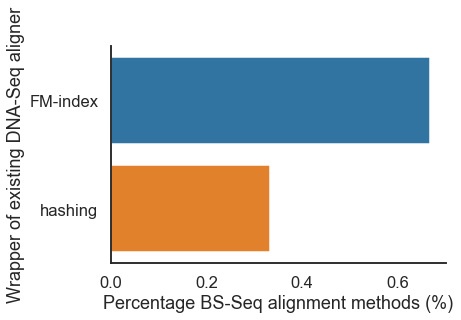

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="counts", y="index", data=data_index_BS)
g.set(xlabel='Percentage BS-Seq alignment methods (%)', ylabel='Indexing algorithm')
g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/index_barplot_BSSeq.png", bbox_inches='tight')

In [151]:
value_counts=data_RNA['wrapper'].value_counts(normalize=True)
data_wrapper_RNA = pd.DataFrame(value_counts)
data_wrapper_RNA = data_wrapper_RNA.reset_index()
data_wrapper_RNA.columns = ['wrapper', 'counts'] # change column names
data_wrapper_RNA.head()

,wrapper,counts
0,N,0.529412
1,Y,0.470588


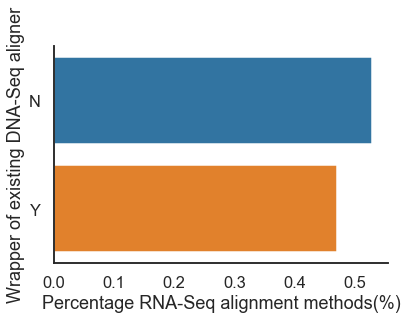

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="counts", y="wrapper", data=data_wrapper_RNA)
g.set(xlabel='Percentage RNA-Seq alignment methods(%)', ylabel='Wrapper of existing DNA-Seq aligner')
g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/wrapper_barplot_RNASeq.png", bbox_inches='tight')

In [155]:
value_counts=data_BS['wrapper'].value_counts(normalize=True)
data_wrapper_BS = pd.DataFrame(value_counts)
data_wrapper_BS = data_wrapper_BS.reset_index()
data_wrapper_BS.columns = ['wrapper', 'counts'] # change column names
data_wrapper_BS.head()

,wrapper,counts
0,Y,0.5
1,N,0.5


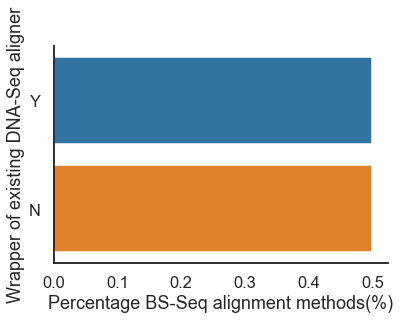

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="counts", y="wrapper", data=data_wrapper_BS)
g.set(xlabel='Percentage BS-Seq alignment methods(%)', ylabel='Wrapper of existing DNA-Seq aligner')
g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/wrapper_barplot_BSSeq.png", bbox_inches='tight')

In [147]:
data_RNA_notWrapper=data_RNA.loc[data_RNA['wrapper'] != 'Y']
data_RNA_notWrapper

,Year_of_publication,Number_of_citations,index,global,wrapper,local,chain_of_seeds,technology,age,citation_per_year,index2
40,2010,58.0,hashing,seed,N,No Alignment,N,RNA-Seq,10,5.800000,hashing
46,2011,112.0,BWT-FM,seed,N,Non-DP heuristic,N,RNA-Seq,9,12.444444,FM-index
55,2012,72.0,hashing,chain of seeds,N,NaN,N,RNA-Seq,8,9.000000,hashing
64,2013,60.0,BWT-FM,seed,N,Non-DP heuristic,N,RNA-Seq,7,8.571429,FM-index
68,2013,6021.0,suffix array,seed,N,Local,N,RNA-Seq,7,860.142857,Other suffix tree structure
69,2013,775.0,hashing,seed,N,Local,N,RNA-Seq,7,110.714286,hashing
79,2015,1611.0,BWT-FM,Backward Search,N,hamming distance,N,RNA-Seq,5,322.200000,FM-index
86,2017,3.0,BWT-FM,Backward Search,N,Global,N,RNA-Seq,3,1.000000,FM-index
91,2019,NaN,hashing,seed,N,Local,N,RNA-Seq,1,NaN,hashing


In [148]:
value_counts=data_RNA_notWrapper['index2'].value_counts(normalize=True)
data_index_RNA_notWrapper = pd.DataFrame(value_counts)
data_index_RNA_notWrapper = data_index_RNA_notWrapper.reset_index()
data_index_RNA_notWrapper.columns = ['index', 'counts'] # change column names
data_index_RNA_notWrapper.head()

,index,counts
0,hashing,0.444444
1,FM-index,0.444444
2,Other suffix tree structure,0.111111


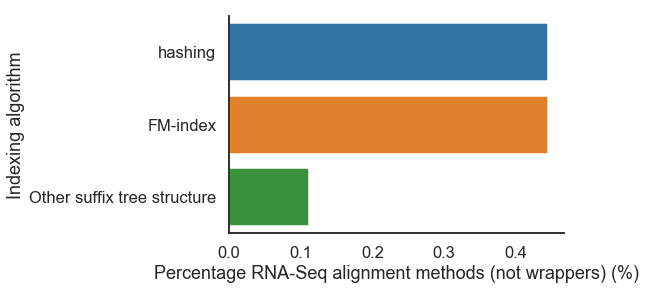

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="counts", y="index", data=data_index_RNA_notWrapper)
g.set(xlabel='Percentage RNA-Seq alignment methods (not wrappers) (%)', ylabel='Indexing algorithm')
g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/index_barplot_RNASeq_notWraper.png", bbox_inches='tight')

In [161]:
data_BS_notWrapper=data_BS.loc[data_BS['wrapper'] != 'Y']
data_BS_notWrapper

,Year_of_publication,Number_of_citations,index,global,wrapper,local,chain_of_seeds,technology,age,citation_per_year,index2
15,2009,62.0,hashing,seed,N,Hamming Distance,N,Bisulfite,11,5.636364,hashing
16,2009,475.0,hashing,seed,N,Hamming Distance,N,Bisulfite,11,43.181818,hashing
53,2012,65.0,BWT-FM,Backward Search,N,Hamming Distance,N,Bisulfite,8,8.125000,FM-index


In [163]:
value_counts=data_BS_notWrapper['index2'].value_counts(normalize=True)
data_index_BS_notWrapper = pd.DataFrame(value_counts)
data_index_BS_notWrapper = data_index_BS_notWrapper.reset_index()
data_index_BS_notWrapper.columns = ['index', 'counts'] # change column names
data_index_BS_notWrapper.head()

,index,counts
0,hashing,0.666667
1,FM-index,0.333333


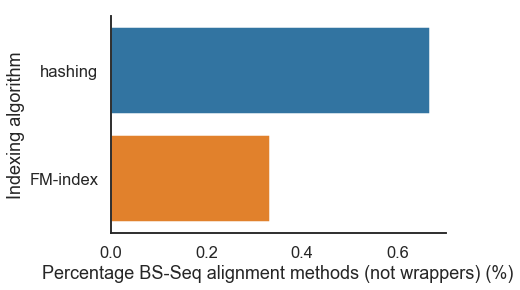

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="counts", y="index", data=data_index_BS_notWrapper)
g.set(xlabel='Percentage BS-Seq alignment methods (not wrappers) (%)', ylabel='Indexing algorithm')
g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/index_barplot_BSSeq_notWraper.png", bbox_inches='tight')

In [83]:
value_counts=data['Technology'].value_counts(normalize=True)
data_technology = pd.DataFrame(value_counts)
data_technology = data_technology.reset_index()
data_technology.columns = ['technology', 'counts'] # change column names
data_technology.head()

,technology,counts
0,DNA,0.717391
1,RNA-Seq,0.173913
2,Bisulfite,0.065217
3,DNA/RNA-Seq,0.021739
4,RNA-seq,0.010870


# Technology 

# Index

In [84]:
n=data.shape[0]

n_hashing=data.loc[data['Indexing_algorithm'] == 'hashing'].shape[0]
n_FM=data.loc[data['Indexing_algorithm'] == 'BWT-FM'].shape[0]
n_ST=data.loc[data['Indexing_algorithm'] != 'hashing'].shape[0]-n_FM



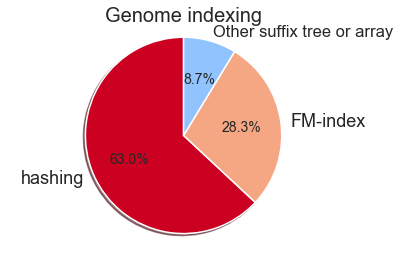

In [85]:
import matplotlib as mpl
import pylab as pl

mpl.rcParams['font.size'] = 14
labels = 'hashing', 'FM-index','Other suffix tree or array'
sizes = [n_hashing, n_FM,n_ST]
values = [my_colors.red, my_colors.orange, my_colors.blue, 'grey']
fig1, ax1 = pl.subplots()

ax1.set_title("Genome indexing", fontsize=20)
patches, texts, autotexts= ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
texts[1].set_fontsize(18)

pl.savefig('Figure_1_panels/Index_pie.pdf')

# Global

In [89]:
n=data.shape[0]

n_seed=data.loc[data['global'] == 'seed'].shape[0]
n_BS=data.loc[data['global'] == 'Backward Search'].shape[0]

print (n_seed,n_BS,n_chain)

KeyError: 'global'

In [90]:
import matplotlib as mpl
import pylab as pl

mpl.rcParams['font.size'] = 14
labels = 'Seed', 'Chain of seeds', 'Backward search'
sizes = [n_seed, n_BS, n_chain]
values = [my_colors.red, my_colors.orange, my_colors.blue, 'grey']
fig1, ax1 = pl.subplots()

ax1.set_title("Global aligment", fontsize=20)
patches, texts, autotexts= ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
texts[2].set_fontsize(18)
pl.savefig('Figure_1_panels/Global_pie.pdf')

NameError: name 'n_seed' is not defined

# Local

In [91]:
n=data.shape[0]

n_DP=data.loc[data['local'] == 'DP'].shape[0]
n_NW=data.loc[data['local'] == 'Needleman–Wunsch'].shape[0]
n_SW=data.loc[data['local'] == 'Smith-Waterman'].shape[0]
n_BT=data.loc[data['local'] == 'backtracking'].shape[0]
n_HD=data.loc[data['local'] == 'hamming distance'].shape[0]

n_other=n-n_DP-n_NW-n_SW-n_BT-n_HD

print n_DP,n_NW,n_SW,n_BT,n_HD,n_other

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(n_DP,n_NW,n_SW,n_BT,n_HD,n_other)? (<ipython-input-91-a19d9b125780>, line 11)

In [92]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'D.P.', 'Needleman-Wunsch', 'Smith-Waterman', 'Backtracking','Hamming distance','Not specicified'
sizes = [n_DP, n_NW, n_SW, n_BT,n_HD,n_other]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','grey','green']
explode = (0, 0, 0, 0,0,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.savefig('Figure_1_panels/Local_pie.pdf')

NameError: name 'n_DP' is not defined

# Number of citations -- index

In [107]:
data.groupby(['global_alignment_algorithm'])['Number_of_citations'].sum()

global_alignment_algorithm
Backward Search    54511.0
chain of seeds      1902.0
seed               51860.0
seed                  54.0
Name: Number_of_citations, dtype: float64

KruskalResult(statistic=2.96620377594013, pvalue=0.08502115449643342)
KruskalResult(statistic=0.8414918414918304, pvalue=0.3589704517278517)
KruskalResult(statistic=0.08965517241381349, pvalue=0.7646159909705845)


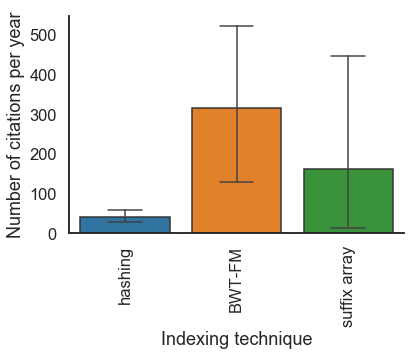

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

data_clean=data.loc[data['index'] != 'BWT-ST']
data_clean=data_clean.loc[data_clean['index'] != 'suffix tree']



g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="index", y="citation_per_year", data=data_clean,edgecolor=(0.2,0.2,0.2), capsize=0.3,  errwidth=1.5)

#g=sns.boxplot(x="index", y="citation_per_year", data=data)
#g=sns.swarmplot(x="index", y="citation_per_year", data=data)

g.set(xlabel='Indexing technique', ylabel='Number of citations per year')
g=sns.despine()
plt.xticks(rotation=90)
pl.savefig('Figure_1_panels/Citation.per.index.pdf', bbox_inches='tight')




p_value1 = stats.kruskal(data[(data['index']=='hashing')].index.tolist(),
                         data[(data['index']=='BWT-FM')].index.tolist())

p_value2 = stats.kruskal(data[(data['index']=='suffix array')].index.tolist(),
                         data[(data['index']=='BWT-FM')].index.tolist())

p_value3 = stats.kruskal(data[(data['index']=='suffix array')].index.tolist(),
                         data[(data['index']=='hashing')].index.tolist())

print (p_value1)
print (p_value2)
print (p_value3)

# Number of citations -- local

KruskalResult(statistic=22.629644808743137, pvalue=1.964302465428671e-06)
KruskalResult(statistic=0.45057471264367166, pvalue=0.502062158789853)


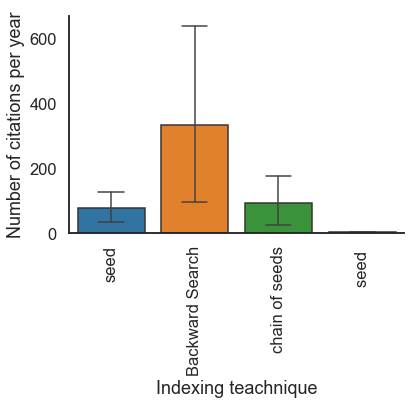

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats




g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="global", y="citation_per_year", data=data_clean,edgecolor=(0.2,0.2,0.2), capsize=0.3,  errwidth=1.5)

#g=sns.boxplot(x="index", y="citation_per_year", data=data)
#g=sns.swarmplot(x="index", y="citation_per_year", data=data)

g.set(xlabel='Indexing teachnique', ylabel='Number of citations per year')
g=sns.despine()
plt.xticks(rotation=90)
pl.savefig('Figure_1_panels/Citation.per.global.pdf', bbox_inches='tight')




p_value1 = stats.kruskal(data[(data['global']=='Backward Search')].index.tolist(),
                         data[(data['global']=='seed')].index.tolist())

p_value2 = stats.kruskal(data[(data['global']=='Backward Search')].index.tolist(),
                         data[(data['global']=='chain of seeds')].index.tolist())



print p_value1
print p_value2


KruskalResult(statistic=7.249999999999986, pvalue=0.0070901012238155986)
KruskalResult(statistic=9.44642857142857, pvalue=0.0021156065158529974)


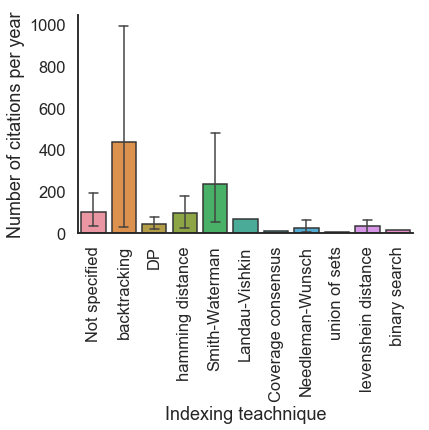

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats





g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="local", y="citation_per_year", data=data_clean,edgecolor=(0.2,0.2,0.2), capsize=0.3,  errwidth=1.5)

#g=sns.boxplot(x="index", y="citation_per_year", data=data)
#g=sns.swarmplot(x="local", y="citation_per_year", data=data)

g.set(xlabel='Indexing teachnique', ylabel='Number of citations per year')
g=sns.despine()
plt.xticks(rotation=90)
pl.savefig('Figure_1_panels/Citation.per.local.pdf', bbox_inches='tight')




p_value1 = stats.kruskal(data[(data['local']=='hamming distance')].index.tolist(),
                         data[(data['local']=='Smith-Waterman')].index.tolist())

p_value2 = stats.kruskal(data[(data['local']=='backtracking')].index.tolist(),
                         data[(data['local']=='Smith-Waterman')].index.tolist())



print p_value1
print p_value2


# Technology 

KruskalResult(statistic=0.4031183368870188, pvalue=0.525483196218611)


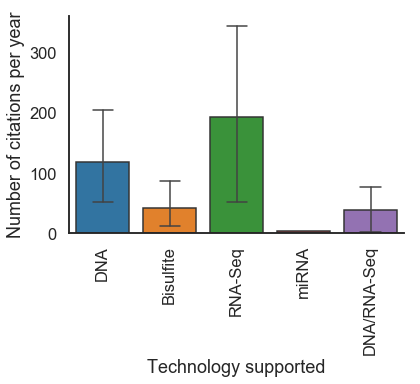

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="technology", y="citation_per_year", data=data,edgecolor=(0.2,0.2,0.2), 
            capsize=0.3,  errwidth=1.5)
g.set(xlabel='Technology supported', ylabel='Number of citations per year')
g=sns.despine()
plt.xticks(rotation=90)
pl.savefig('Figure_1_panels/Citation.per.domain.pdf', bbox_inches='tight')

p_value = stats.kruskal(data[(data.technology=='DNA')].index.tolist(),
                         data[(data.technology=='RNA-Seq')].index.tolist())
print p_value

# Technology by year

In [16]:
n_tools_DNA=[]
n_tools_RNA=[]
n_tools_BS=[]



for i in range(2001,2019):
    df_temp=data[(data.year == i)]
    n_tools_DNA.append(df_temp[(df_temp.technology == 'DNA')].shape[0])
    n_tools_RNA.append(df_temp[(df_temp.technology == 'RNA-Seq')].shape[0])
    n_tools_BS.append(df_temp[(df_temp.technology == 'Bisulfite')].shape[0])
    
    

from numpy import cumsum, ones


n_tools_DNA_cumsum=cumsum(n_tools_DNA)
n_tools_RNA_cumsum=cumsum(n_tools_RNA)
n_tools_BS_cumsum=cumsum(n_tools_BS)

print n_tools_DNA_cumsum
print n_tools_RNA_cumsum
print n_tools_BS_cumsum


[ 1  2  3  3  5  5  5 12 27 33 39 48 52 58 59 65 65 67]
[ 0  0  0  0  0  0  0  1  2  5  6  8 12 13 15 15 16 16]
[0 0 0 0 0 0 0 0 2 3 4 5 6 6 6 6 6 6]


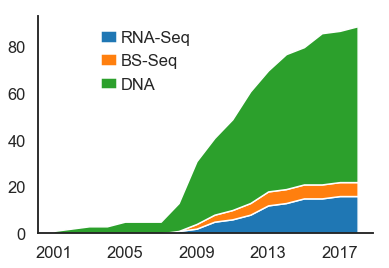

In [17]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
g=sns.set_style("white")
g=sns.set_context("talk")    
    
# Data
x=range(2001,2019)
y=[n_tools_RNA_cumsum, n_tools_BS_cumsum,n_tools_DNA_cumsum ]
 
plt.xticks(np.arange(2001, 2019, step=4))
plt.yticks(np.arange(0, 110, step=20))   

    
# Plot
plt.stackplot(x,y, labels=['RNA-Seq','BS-Seq','DNA',])
plt.legend(loc='upper left')

plt.legend(bbox_to_anchor=(0.5,1), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1)

g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/Number.tools.per.domain.pdf", bbox_inches='tight')

# Index by year

In [18]:
tools_hashing=[]
tools_FM=[]
tools_suffix=[]



for i in range(2001,2019):
    df_temp=data[(data.year == i)]
    
    
    n_hash=df_temp.loc[df_temp['index'] == 'hashing'].shape[0]
    n_FM=df_temp.loc[df_temp['index'] == 'BWT-FM'].shape[0]
    n_suffix=df_temp.loc[df_temp['index'] == 'suffix array'].shape[0]
    
    tools_hashing.append(n_hash)
    tools_FM.append(n_FM)
    tools_suffix.append(n_suffix)
    
    

from numpy import cumsum, ones


tools_hashing_cumsum=cumsum(tools_hashing)
tools_FM_cumsum=cumsum(tools_FM)
tools_suffix_cumsum=cumsum(tools_suffix)

print tools_hashing_cumsum
print tools_FM_cumsum
print tools_suffix_cumsum


[ 1  2  3  3  5  5  5 11 24 31 36 43 46 49 49 55 55 58]
[ 0  0  0  0  0  0  0  1  5  8 10 14 18 21 23 23 24 25]
[0 0 0 0 0 0 0 1 2 3 4 4 5 6 6 6 6 6]


In [80]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
g=sns.set_style("white")
g=sns.set_context("talk")    
    
# Data
x=range(2001,2019)
y=[tools_FM_cumsum, tools_suffix_cumsum,tools_hashing_cumsum ]
 
plt.xticks(np.arange(2001, 2019, step=4))
plt.yticks(np.arange(0, 110, step=20))   

    
# Plot
plt.stackplot(x,y, labels=['BWT-FM','General Suffix tree','hashing'])
plt.legend(loc='upper left')

plt.legend(bbox_to_anchor=(0.5,1), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1)

g=sns.despine()
#plt.show(g)


plt.savefig("Figure_1_panels/Number.tools.per.index.pdf")


NameError: name 'tools_FM_cumsum' is not defined

In [20]:
import pandas as pd
from pysankey import sankey

pd.options.display.max_rows = 8
df = pd.read_csv(
    'pysankey/fruits.txt', sep=' ', names=['true', 'predicted']
)
colorDict = {
    'apple':'#f71b1b',
    'blueberry':'#1b7ef7',
    'banana':'#f3f71b',
    'lime':'#12e23f',
    'orange':'#f78c1b'
}
sankey(
    df['true'], df['predicted'], aspect=20, colorDict=colorDict,
    fontsize=12, figureName="fruit"
)
# Result is in "fruit.png"

ImportError: No module named pysankey